In [10]:
import os
import sys
cwd = os.getcwd()
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, os.path.join(cwd, "../"))

import pickle
import torch
from src.utils.read_utils import read_pickle
import src.utils.data_conversion_utils as conversions
import src.bin.validations as validations
import src.utils.print_utils as debug
import src.models.grud as grud 
import src.data_getter.student_life_var_binned_data_getter as data_getter
import src.bin.trainer as trainer
import importlib
import src.bin.tensorify as tensorify
from src.bin import plotting
from sklearn import metrics

importlib.reload(validations)
importlib.reload(conversions)
importlib.reload(tensorify)
importlib.reload(grud)
importlib.reload(trainer)

pickle_file_path = '../data/training_data/student_life_pickle.pkl'            

data = data_getter.get_data_for_pkl_file(35)
data = conversions.convert_logical_not_missing_flags(data)
data = conversions.get_transposed_data(data)

In [11]:
# GruD Parameters
first_key = next(iter(data['data'].keys()))

feature_list = ['activity_inference_mode', 'audio_activity_inference_mode', 'conv_duration_min_sum',
  'dark_duration_min_sum', 'phonecharge_duration_min_sum', 'phonelock_duration_min_sum',
  'latitude_mode', 'longitude_mode', 'hours_slept_sum', 'sleep_rating_sum']

################################## Init ##################################
# Number of features in data.
input_size = len(data['data'][first_key][1])
# Number of classes. For student life it is 5.
output_size = 5 
# Same as input size.
hidden_size = input_size
# This is the sequence size
num_layers = 1440
x_mean=[0.0 , 0.0 , 10.0, 10.0, 0.0, 600.0, 0.0, 0.0, 8.0, 3.0]
# Note :  GRUD accepts data with rows as features and columns as time steps! So we need to transpose the data.

learning_rate = 0.1
learning_rate_decay = 100
n_epochs = 18

model = grud.GRUD(input_size = input_size,
             hidden_size= hidden_size,
             output_size=output_size,
             dropout=0, 
             dropout_type='mloss', 
             x_mean=x_mean, 
             num_layers=num_layers)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

data = tensorify.tensorify_data_gru_d(data)

xxxxxxxxxxxxxx epoch: 0 xxxxxxxxxxxxxx


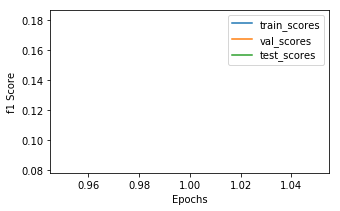

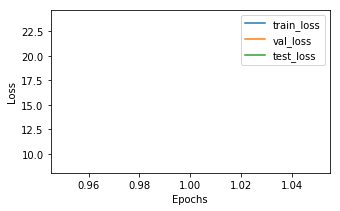

xxxxxxxxxxxxxx epoch: 1 xxxxxxxxxxxxxx


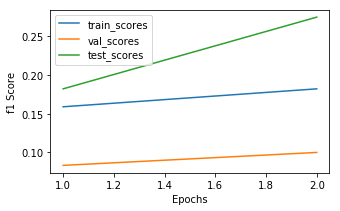

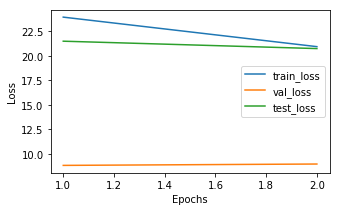

xxxxxxxxxxxxxx epoch: 2 xxxxxxxxxxxxxx


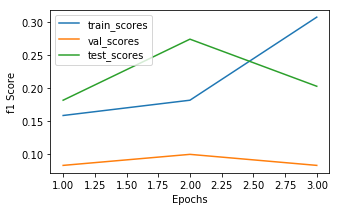

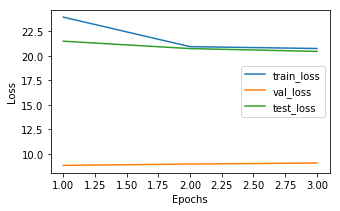

xxxxxxxxxxxxxx epoch: 3 xxxxxxxxxxxxxx


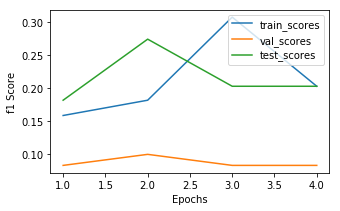

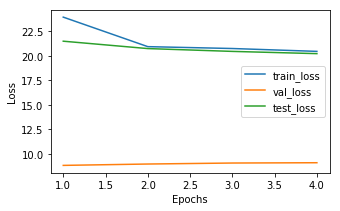

xxxxxxxxxxxxxx epoch: 4 xxxxxxxxxxxxxx


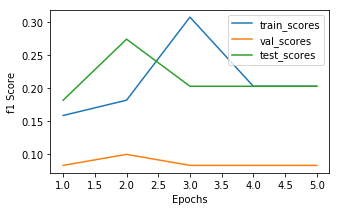

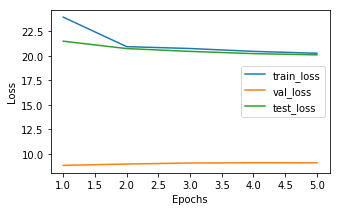

xxxxxxxxxxxxxx epoch: 5 xxxxxxxxxxxxxx


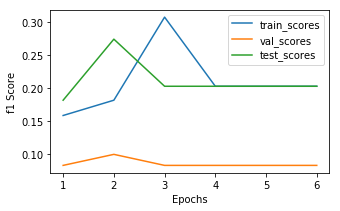

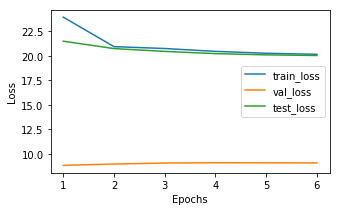

xxxxxxxxxxxxxx epoch: 6 xxxxxxxxxxxxxx


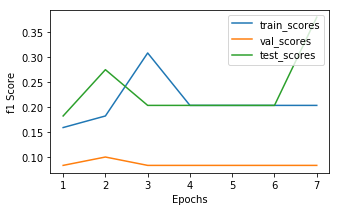

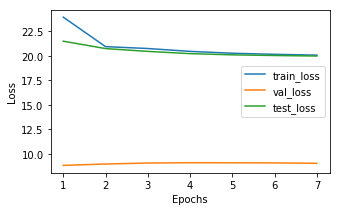

xxxxxxxxxxxxxx epoch: 7 xxxxxxxxxxxxxx


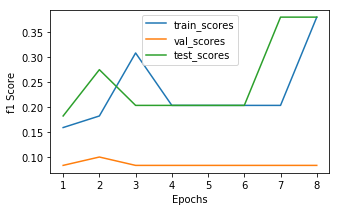

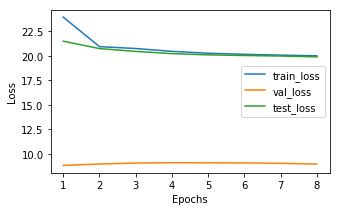

xxxxxxxxxxxxxx epoch: 8 xxxxxxxxxxxxxx


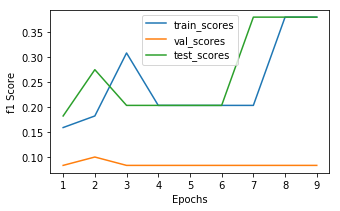

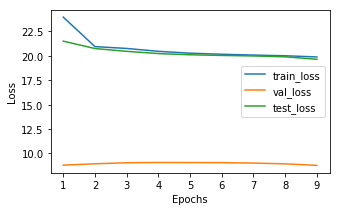

xxxxxxxxxxxxxx epoch: 9 xxxxxxxxxxxxxx


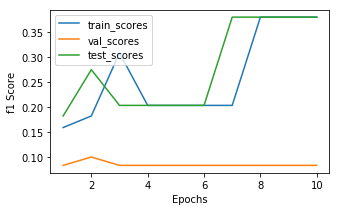

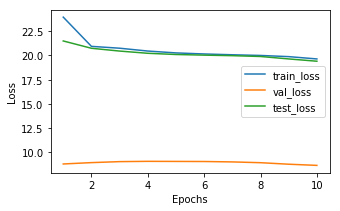

xxxxxxxxxxxxxx epoch: 10 xxxxxxxxxxxxxx


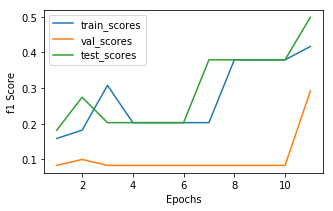

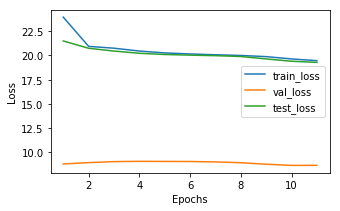

xxxxxxxxxxxxxx epoch: 11 xxxxxxxxxxxxxx


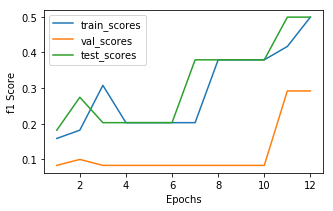

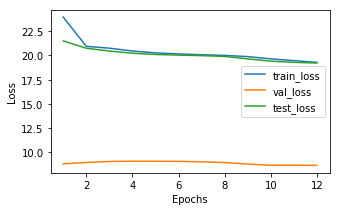

xxxxxxxxxxxxxx epoch: 12 xxxxxxxxxxxxxx


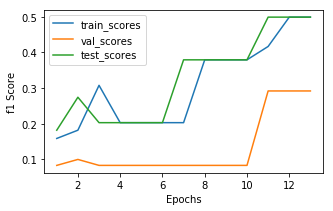

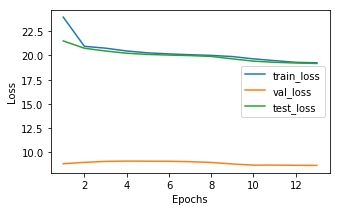

xxxxxxxxxxxxxx epoch: 13 xxxxxxxxxxxxxx


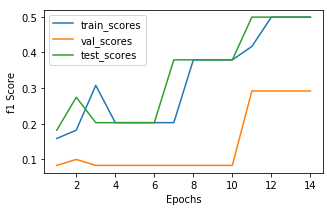

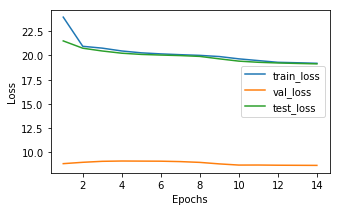

xxxxxxxxxxxxxx epoch: 14 xxxxxxxxxxxxxx


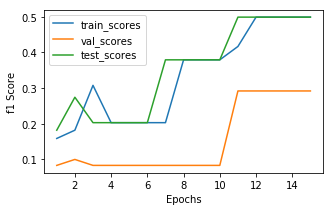

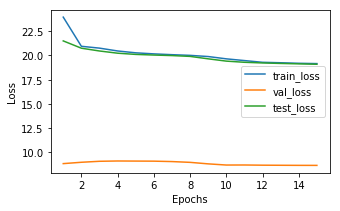

xxxxxxxxxxxxxx epoch: 15 xxxxxxxxxxxxxx


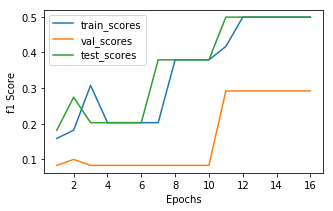

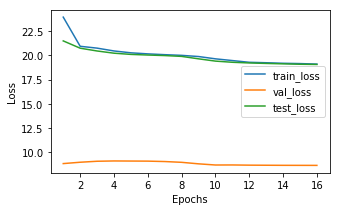

xxxxxxxxxxxxxx epoch: 16 xxxxxxxxxxxxxx


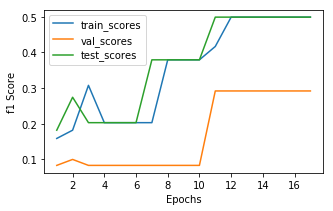

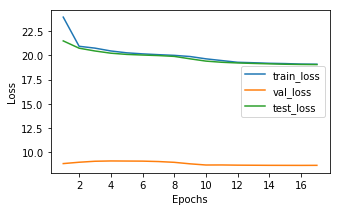

xxxxxxxxxxxxxx epoch: 17 xxxxxxxxxxxxxx


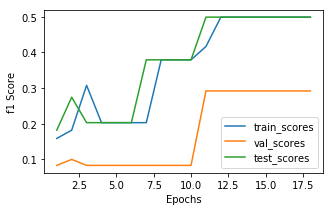

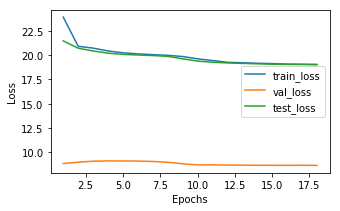

In [12]:
loss_over_epochs = {
    "train_loss" : [],
    "val_loss" : [],
    "test_loss" : []
}

scores_over_epochs = {
    "train_scores" : [],
    "val_scores" : [],
    "test_scores" : []
}

for epoch in range(18):
    print("xxxxxxxxxxxxxx epoch: {} xxxxxxxxxxxxxx".format(epoch))
    train_loss, train_labels, train_preds =  trainer.evaluate_set(data, 'train_ids', model, criterion, optimizer)
    val_loss, val_labels, val_preds =  trainer.evaluate_set(data, 'val_ids', model, criterion)
    test_loss, test_labels, test_preds =  trainer.evaluate_set(data, 'train_ids', model, criterion)
    
    loss_over_epochs['train_loss'].append(train_loss)
    loss_over_epochs['val_loss'].append(val_loss)
    loss_over_epochs['test_loss'].append(test_loss)
    
    scores_over_epochs['train_scores'].append(metrics.precision_recall_fscore_support(train_labels,
                                                                                     train_preds, 
                                                                                     average='macro'))
    scores_over_epochs['val_scores'].append(metrics.precision_recall_fscore_support(val_labels, 
                                                                                   val_preds, 
                                                                                   average='macro'))
    scores_over_epochs['test_scores'].append( metrics.precision_recall_fscore_support(test_labels,
                                                                                     test_preds,
                                                                                     average='macro'))
    
    plotting.plot_score_over_n_epochs(scores_over_epochs, score_type='f1', fig_size=(5, 3))
    plotting.plot_loss_over_n_epochs(loss_over_epochs, fig_size=(5, 3))
    
    
    
    
    
    

In [7]:
print(len(data['train_ids']))
print(len(data['val_ids']))
print(len(data['test_ids']))

16
7
5


In [9]:
print(28 * 0.2)
print(int(5.6000000000000005))

5.6000000000000005
5
